In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Analysis
Uses the pickled files of the statistics from statistics_pickle.py to create analysed plots.

In [144]:
filenames = [
    "result_msr_MSR_fit0_its100000_addprob1_time26_20_13_22.csv",
            "result_reproduce_fit0_its100000_time20_20_10_36.csv",
            "result_no_rec_fit0_its100000_time21_11_16_04.csv",
            "result_delete_state_fit0_its100000_addprob0.8_pref0_time26_21_38_24.csv",
            "result_reproduce_fit0_its100000_addprob1_pref1_time26_21_46_07.csv",
    "merged_dataframes_pref2.csv",
    "result_reproduce_fit0_its100000_addprob1_pref3_merged.csv"
]

In [145]:
def load_pickles(filenames):
    dicts = []
    for file_name in filenames:
        dicts.append(pickle.load( open( 'pickles/'+file_name[:-3]+'p', "rb" ) ))
        
    return dicts

In [156]:
dicts = load_pickles(filenames)
xtick_labels = [
    'with subclass', 
    'basic\nmodel',
    'no\nrecursion',
    'delete\nstate-\nments',
    'no\ncallee\npref',
    'no\ncaller\npref',
    'no pref'
]

In [157]:
for dictie in dicts:
    print(len(dictie['fmin_means']))

60
60
60
60
60
60
60


Fmin over all steps

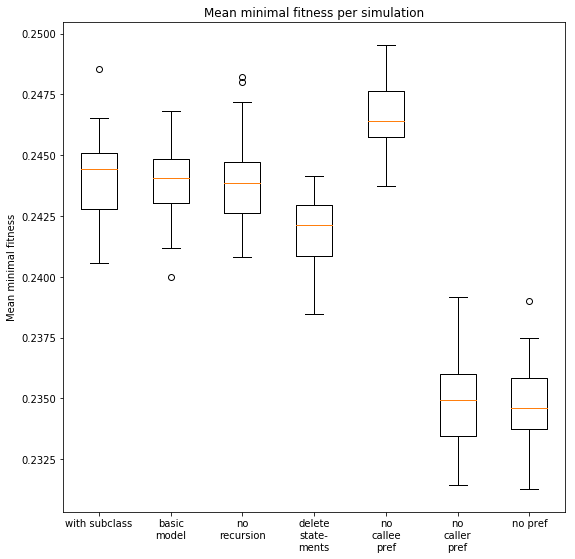

In [181]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['fmin_means']))
    
# Plot data
fig = plt.figure(figsize=(9, 9))

plt.boxplot(plot_data)
plt.xticks(range(1, len(xtick_labels)+1),xtick_labels)
plt.title('Mean minimal fitness per simulation')
plt.ylabel('Mean minimal fitness')
plt.savefig('fmin_means.png')

Max fmin > f0

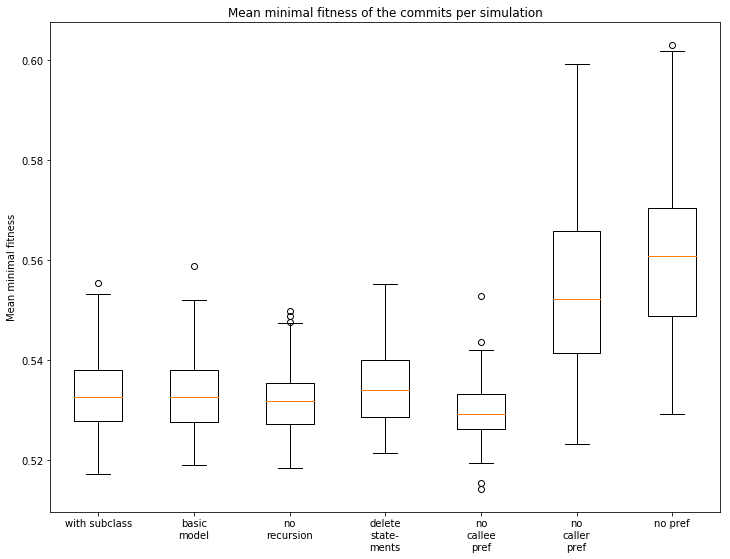

In [172]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['f_commit_mins']))
    
# Plot data
fig = plt.figure(figsize=(12, 9))
plt.boxplot(plot_data)
plt.xticks(range(1, len(xtick_labels)+1),xtick_labels)
plt.title('Mean minimal fitness of the commits per simulation')

plt.ylabel('Mean minimal fitness')
plt.savefig('f_commit_mins.png')

Mean size of steps/lines/changes per commit

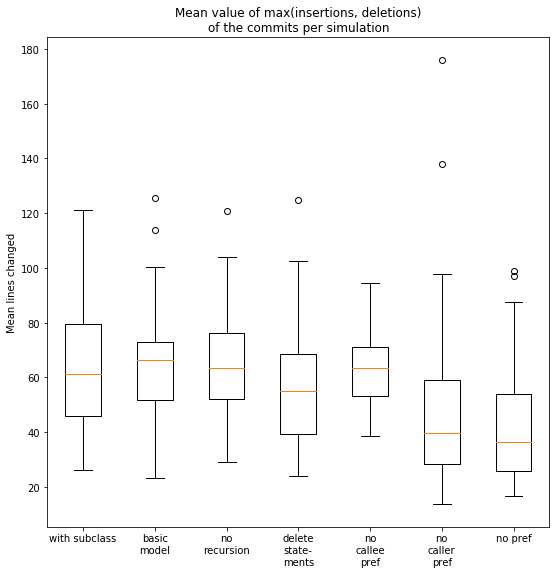

In [182]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['lines_big']))
    
# Plot data
fig = plt.figure(figsize=(9, 9))

plt.boxplot(plot_data)
plt.xticks(range(1, len(xtick_labels)+1),xtick_labels)
plt.title('Mean value of max(insertions, deletions)\nof the commits per simulation')
plt.ylabel('Mean lines changed')
plt.savefig('lines_big.png')

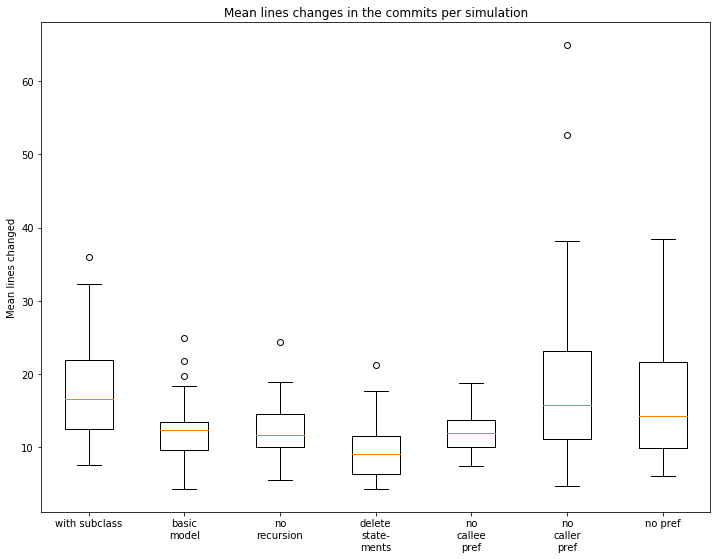

In [174]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['lines_sum']))
    
# Plot data
fig = plt.figure(figsize=(12, 9))

plt.boxplot(plot_data)
plt.xticks(range(1, len(xtick_labels)+1),xtick_labels)
plt.title('Mean lines changes in the commits per simulation')
plt.ylabel('Mean lines changed')
plt.savefig('lines_sum.png')

Changes

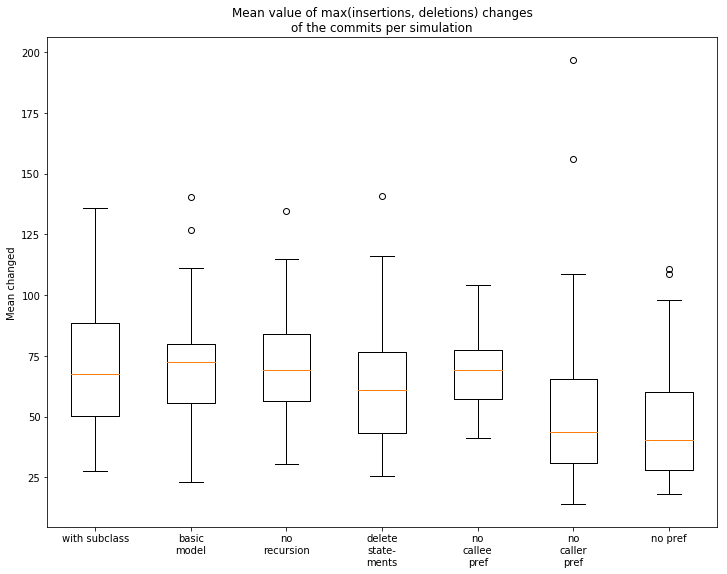

In [175]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['changes_big']))
    
# Plot data
fig = plt.figure(figsize=(12, 9))

plt.boxplot(plot_data)
plt.xticks(range(1, len(xtick_labels)+1),xtick_labels)
plt.title('Mean value of max(insertions, deletions) changes\nof the commits per simulation')
plt.ylabel('Mean changed')
plt.savefig('changes_big.png')

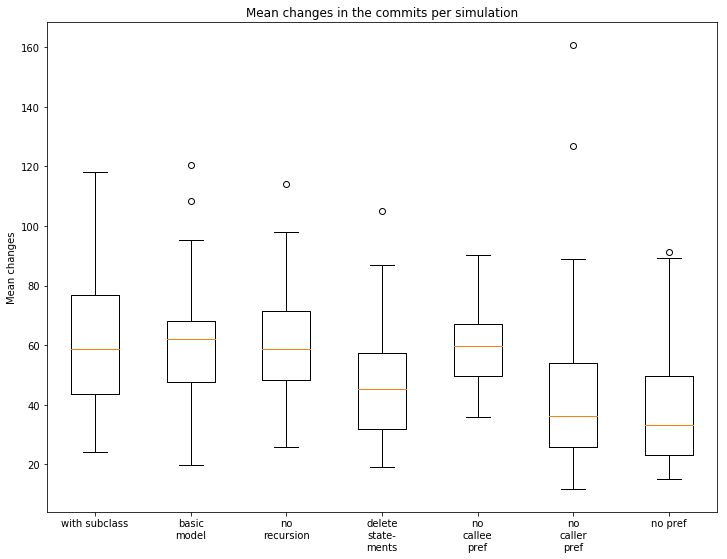

In [176]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['changes_sum']))
    
# Plot data
fig = plt.figure(figsize=(12, 9))

plt.boxplot(plot_data)
plt.xticks(range(1, len(xtick_labels)+1),xtick_labels)
plt.title('Mean changes in the commits per simulation')
plt.ylabel('Mean changes')
plt.savefig('changes_sum.png')

Number of commits

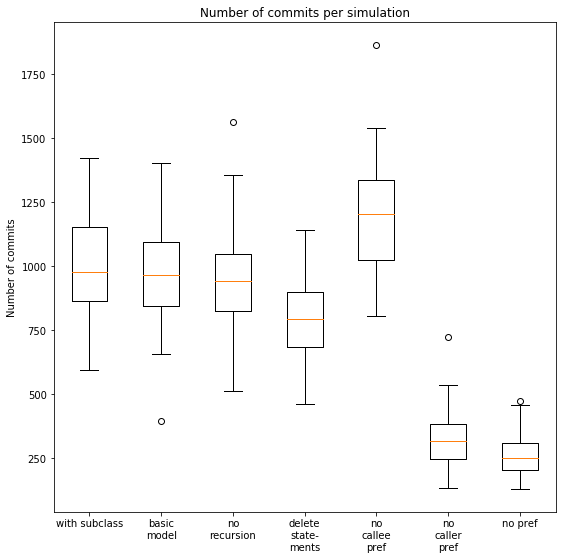

In [183]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['num_commits']))
    
# Plot data
fig = plt.figure(figsize=(9, 9))

plt.boxplot(plot_data)
plt.xticks(range(1, len(xtick_labels)+1),xtick_labels)
plt.title('Number of commits per simulation')
plt.ylabel('Number of commits')
plt.savefig('num_commits.png')

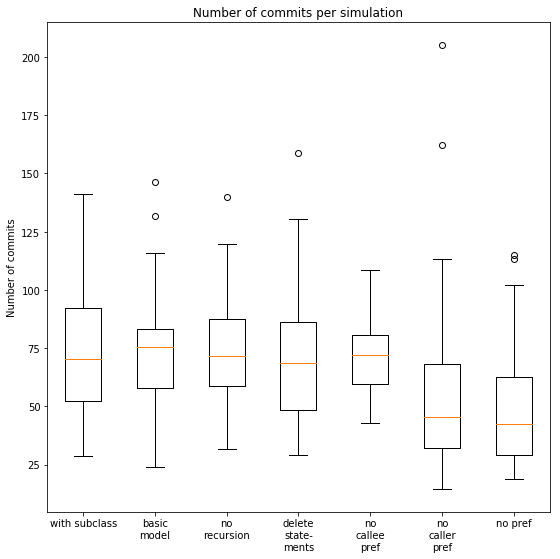

In [184]:
# Get data
plot_data = []
for i in range(len(dicts)):
    plot_data.append(np.array(dicts[i]['steps']))
    
# Plot data
fig = plt.figure(figsize=(9, 9))

plt.boxplot(plot_data)
plt.xticks(range(1, len(xtick_labels)+1),xtick_labels)
plt.title('Number of commits per simulation')
plt.ylabel('Number of commits')
plt.savefig('num_commits.png')

Proportions of last actions per commit

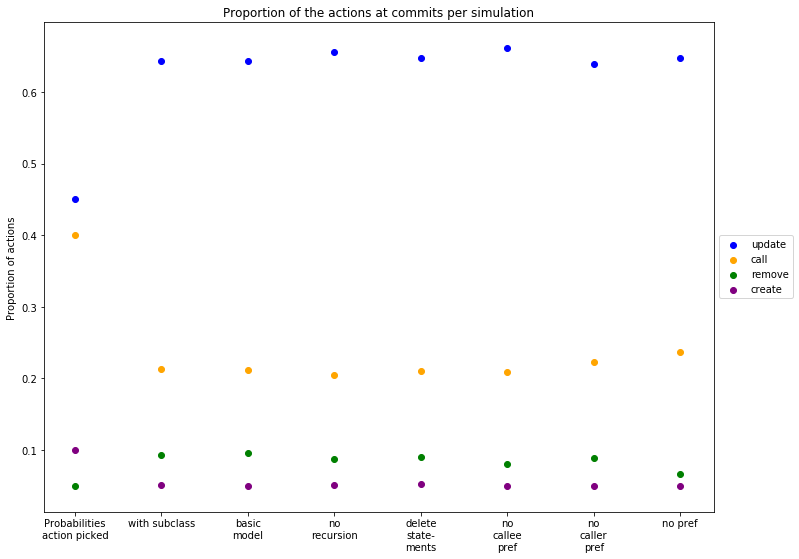

In [178]:
colors = ['blue', 'orange', 'green', 'purple']
fig = plt.figure(figsize=(12, 9))

# Pplot the real probabilities
plt.scatter(1, .45, c=colors[0], label='update')
plt.scatter(1, .4, c=colors[1], label='call')
plt.scatter(1, .05, c=colors[2], label='remove')
plt.scatter(1, .1, c=colors[3], label='create')
    
plot_data = []
for i in range(len(dicts)):
    update, call, remove, create = zip(*dicts[i]['action_props'])
    plt.scatter(i+2, np.array(update).mean(), c=colors[0])
    plt.scatter(i+2, np.array(call).mean(), c=colors[1])
    plt.scatter(i+2, np.array(remove).mean(), c=colors[2])
    plt.scatter(i+2, np.array(create).mean(), c=colors[3])

plt.xticks(range(1, len(dicts)+2),['Probabilities\naction picked']+xtick_labels)
plt.title('Proportion of the actions at commits per simulation')
plt.ylabel('Proportion of actions')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('action_props.png')

Correlations between fmin and ... action, code size, changes, step

In [ ]:
#TODO